In [101]:
import pandas as pd
from utils import load_jsonl
import numpy as np
import matplotlib.pyplot as plt

## Comparison of different reviews of the same answers

In [110]:
reviewer_ratings_paths = ['./matchups/rakuda_koukou_v0.jsonl', './matchups/rakuda_koukou_v0_v2prompt.jsonl']
reviewer_ratings = {}

In [111]:
for path in reviewer_ratings_paths:
    reviewer_ratings[path.split('/')[-1]] = {(item['answer1_id'], item['answer2_id']):item for item in load_jsonl(path)}
    
reviewers = list(reviewer_ratings.keys())

In [112]:
common_ids = set(list(reviewer_ratings.values())[0])
for ratings in reviewer_ratings.values():
    common_ids = set(ratings).intersection(common_ids)

In [113]:
len(common_ids)

936

In [114]:
common_ratings = []
for common_id in common_ids:
    common_rating = {}
    for key in reviewers:
        score = reviewer_ratings[key][common_id]['score']
        if score == 3:
            score = 1.5
        common_rating[key] = score
    common_rating['model1_id'] = reviewer_ratings[key][common_id]['model1_id']
    common_rating['model2_id'] = reviewer_ratings[key][common_id]['model1_id']
    common_ratings.append(common_rating)

df = pd.DataFrame(common_ratings)

Text(0, 0.5, 'Count')

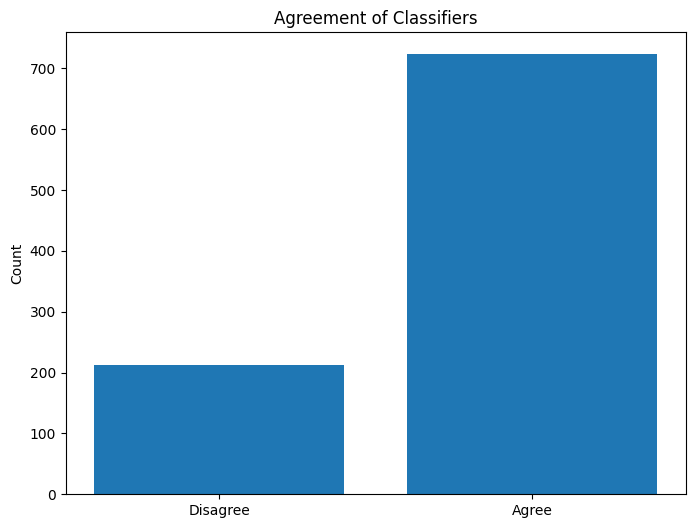

In [115]:
# Create a new column 'agreement' to check if both classifiers agree
df['agreement'] = df[reviewers[0]] == df[reviewers[1]]

# Count the number of agreements and disagreements
agreement_counts = df['agreement'].value_counts()

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot the agreement counts
ax.bar(agreement_counts.index, agreement_counts.values, tick_label=['Agree', 'Disagree'])
ax.set_title('Agreement of Classifiers')
ax.set_ylabel('Count')


Text(0, 0.5, 'rakuda_koukou_v0_v2prompt.jsonl')

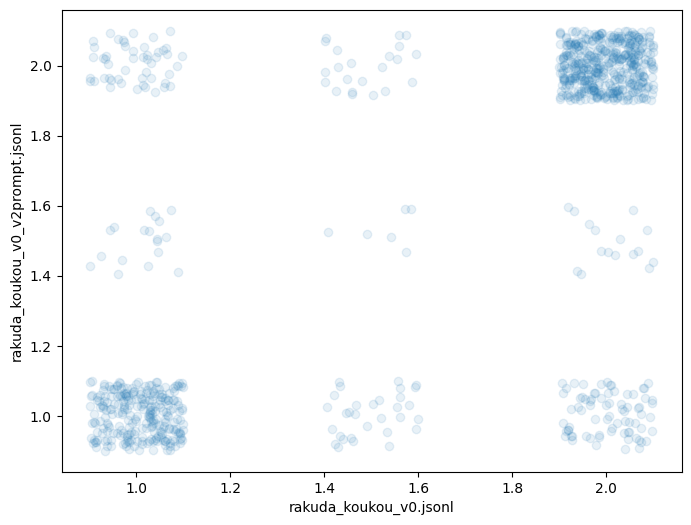

In [116]:
# Add some random noise to the classifier results for the scatter plot
noise = 0.1  # adjust this value to change the amount of noise
df[reviewers[0]+'_noise'] = df[reviewers[0]] + np.random.uniform(-noise, noise, size=len(df))
df[reviewers[1]+'_noise'] = df[reviewers[1]] + np.random.uniform(-noise, noise, size=len(df))

fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(df[reviewers[0]+'_noise'],df[reviewers[1]+'_noise'], alpha=.1)
ax.set_xlabel(reviewers[0])
ax.set_ylabel(reviewers[1])
#plt.legend(loc="upper left")

In [109]:
# Calculate the correlation coefficient
correlation = df[reviewers[0]].corr(df[reviewers[1]])

print(f"The correlation coefficient between the two classifiers is {correlation:.2f}")

The correlation coefficient between the two classifiers is 0.65
